In [1]:
%pylab inline
from simulation import *
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import sys
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
import re
import matplotlib.gridspec as gridspec
import os
from palettable.colorbrewer.qualitative import Set1_5
from scipy.special import gammaln, polygamma


Populating the interactive namespace from numpy and matplotlib


In [2]:
gamelogs2016 = [file for file in os.listdir("./gamelogs/2016") if file.endswith("txt")]
gamelogs2017= [file for file in os.listdir("./gamelogs/2017") if file.endswith("txt")]

gamelogs = []
gamelogs += ["./gamelogs/2017/"+file for file in gamelogs2017]
#gamelogs += ["./gamelogs/2016/"+file for file in gamelogs2016]


#gamelogs = ["nbafinals/game1"]
#gamelogs = ["nbafinals/game1","nbafinals/game2","nbafinals/game3","nbafinals/game4","nbafinals/game5"]
#gamelogs += ["nbafinals/cavspacers1","nbafinals/cavspacers2","nbafinals/cavspacers3","nbafinals/cavspacers4"]
#gamelogs += ["nbafinals/cavsraptors1","nbafinals/cavsraptors2","nbafinals/cavsraptors3","nbafinals/cavsraptors4"]
#gamelogs += ["nbafinals/cavsceltics1","nbafinals/cavsceltics2","nbafinals/cavsceltics3","nbafinals/cavsceltics4","nbafinals/cavsceltics5"]

In [3]:
Lebron_FT  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tLeBron' in line and "free throw" in line]) for game in gamelogs]
Lebron_3  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tLeBron' in line and "three" in line]) for game in gamelogs]
Lebron_jumper  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tLeBron' in line and "jumper" in line]) for game in gamelogs]

Kyrie_FT = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tKyrie Irving' in line and "free throw" in line]) for game in gamelogs]
Kyrie_3  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tKyrie Irving' in line and "three" in line]) for game in gamelogs]
Kyrie_jumper = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tKyrie Irving' in line and "jumper" in line]) for game in gamelogs]

JR_3 = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tJR' in line and "three" in line]) for game in gamelogs]
#Klay_3 = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tKlay' in line and "three" in line]) for game in gamelogs]

In [4]:
bron_models_3 = evaluate_models([l for l in Lebron_3 if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])
bron_models_FT = evaluate_models([l for l in Lebron_FT if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])
bron_models_jumper = evaluate_models([l for l in Lebron_jumper if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])

kyrie_models_3 = evaluate_models([l for l in Kyrie_3 if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])
kyrie_models_FT = evaluate_models([l for l in Kyrie_FT if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])
kyrie_models_jumper = evaluate_models([l for l in Kyrie_jumper if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])

JR_models_3 = evaluate_models([l for l in JR_3 if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])


In [5]:
bron_0 = infer_model(Lebron_FT,["+","-"],0,0)
bron_1 = infer_model(Lebron_FT,["+","-"],1,1)
bron_2 = infer_model(Lebron_FT,["+","-"],1,2)
bron_3 = infer_model(Lebron_FT,["+","-"],1,3)
bron_4 = infer_model(Lebron_FT,["+","-"],1,4)

([<matplotlib.axis.XTick at 0x113af9438>,
 <a list of 4 Text xticklabel objects>)

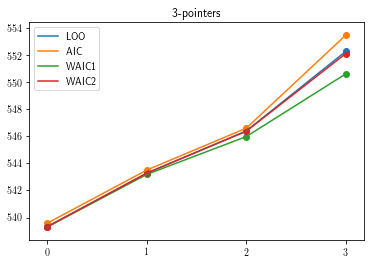

In [6]:


plt.plot([v for v in bron_models_3['LOO'].values()],label="LOO")
plt.scatter(range(4),[v for v in bron_models_3['LOO'].values()])
plt.plot([v for v in bron_models_3['AIC'].values()], label = "AIC")
plt.scatter(range(4),[v for v in bron_models_3['AIC'].values()])
plt.plot([v for v in bron_models_3['WAIC1'].values()],label = "WAIC1")
plt.scatter(range(4),[v for v in bron_models_3['WAIC1'].values()])
plt.plot([v for v in bron_models_3['WAIC2'].values()],label = "WAIC2")
plt.scatter(range(4),[v for v in bron_models_3['WAIC2'].values()])
plt.title("3-pointers")
plt.legend()
plt.xticks(range(4))


([<matplotlib.axis.XTick at 0x113bd3630>,
 <a list of 4 Text xticklabel objects>)

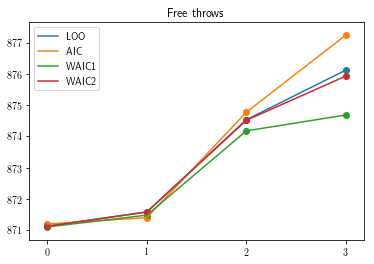

In [7]:


plt.plot([v for v in bron_models_FT['LOO'].values()],label="LOO")
plt.scatter(range(4),[v for v in bron_models_FT['LOO'].values()])
plt.plot([v for v in bron_models_FT['AIC'].values()], label = "AIC")
plt.scatter(range(4),[v for v in bron_models_FT['AIC'].values()])
plt.plot([v for v in bron_models_FT['WAIC1'].values()],label = "WAIC1")
plt.scatter(range(4),[v for v in bron_models_FT['WAIC1'].values()])
plt.plot([v for v in bron_models_FT['WAIC2'].values()],label = "WAIC2")
plt.scatter(range(4),[v for v in bron_models_FT['WAIC2'].values()])
plt.title("Free throws")
plt.legend()
plt.xticks(range(4))


In [8]:
infer_model(Lebron_jumper,["+","-"],0,0)

(defaultdict(functools.partial(<built-in function zeros>, 2),
             {'': array([0.31634446, 0.68365554])}),
 defaultdict(functools.partial(<built-in function zeros>, 2),
             {'': array([180., 389.])}))

In [9]:
infer_model(Lebron_jumper,["+","-"],0,1)

(defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+': array([0.36875, 0.63125]),
              '-': array([0.29245283, 0.70754717]),
              '0': array([0.30769231, 0.69230769])}),
 defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+': array([ 59., 101.]),
              '-': array([ 93., 225.]),
              '0': array([28., 63.])}))

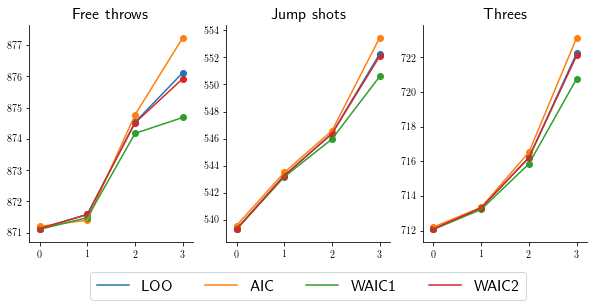

In [10]:
fig = plt.figure(figsize=(10,4))
gs0 = gridspec.GridSpec(1,3, hspace = 0.15,wspace=0.20)

ax = []
ax+= [plt.Subplot(fig,gs0[0,0])]
fig.add_subplot(ax[-1])

ax[-1].plot([v for v in bron_models_FT['LOO'].values()],label="LOO")
ax[-1].scatter(range(4),[v for v in bron_models_FT['LOO'].values()])
ax[-1].plot([v for v in bron_models_FT['AIC'].values()], label = "AIC")
ax[-1].scatter(range(4),[v for v in bron_models_FT['AIC'].values()])
ax[-1].plot([v for v in bron_models_FT['WAIC1'].values()],label = "WAIC1")
ax[-1].scatter(range(4),[v for v in bron_models_FT['WAIC1'].values()])
ax[-1].plot([v for v in bron_models_FT['WAIC2'].values()],label = "WAIC2")
ax[-1].scatter(range(4),[v for v in bron_models_FT['WAIC2'].values()])
ax[-1].set_title( "Free throws",fontsize=16)
ax[-1].spines['top'].set_visible(False)
ax[-1].spines['right'].set_visible(False)
ax[-1].set_xticks(range(4))

ax+= [plt.Subplot(fig,gs0[0,1])]
fig.add_subplot(ax[-1])

ax[-1].plot([v for v in bron_models_3['LOO'].values()],label="LOO")
ax[-1].scatter(range(4),[v for v in bron_models_3['LOO'].values()])
ax[-1].plot([v for v in bron_models_3['AIC'].values()], label = "AIC")
ax[-1].scatter(range(4),[v for v in bron_models_3['AIC'].values()])
ax[-1].plot([v for v in bron_models_3['WAIC1'].values()],label = "WAIC1")
ax[-1].scatter(range(4),[v for v in bron_models_3['WAIC1'].values()])
ax[-1].plot([v for v in bron_models_3['WAIC2'].values()],label = "WAIC2")
ax[-1].scatter(range(4),[v for v in bron_models_3['WAIC2'].values()])
#ax[-1].text(2,872,"Jump shots",fontsize=16)
ax[-1].spines['top'].set_visible(False)
ax[-1].spines['right'].set_visible(False)
ax[-1].set_xticks(range(4))
ax[-1].set_title( "Jump shots",fontsize=16)


ax+= [plt.Subplot(fig,gs0[0,2])]
fig.add_subplot(ax[-1])

ax[-1].plot([v for v in bron_models_jumper['LOO'].values()],label="LOO")
ax[-1].scatter(range(4),[v for v in bron_models_jumper['LOO'].values()])
ax[-1].plot([v for v in bron_models_jumper['AIC'].values()], label = "AIC")
ax[-1].scatter(range(4),[v for v in bron_models_jumper['AIC'].values()])
ax[-1].plot([v for v in bron_models_jumper['WAIC1'].values()],label = "WAIC1")
ax[-1].scatter(range(4),[v for v in bron_models_jumper['WAIC1'].values()])
ax[-1].plot([v for v in bron_models_jumper['WAIC2'].values()],label = "WAIC2")
ax[-1].scatter(range(4),[v for v in bron_models_jumper['WAIC2'].values()])
ax[-1].spines['top'].set_visible(False)
ax[-1].spines['right'].set_visible(False)
ax[-1].set_xticks(range(4))
ax[-1].set_title( "Threes",fontsize=16)


ax[-2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          ncol=5,fontsize=16)

#plt.savefig('../figures/fig4.pdf',bbox_inches = 'tight')

Text(0.05,-0.1,'60/91 (65.9\\%)')

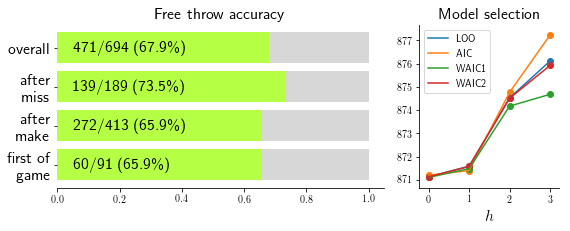

In [11]:
fig = plt.figure(figsize=(9,3))
gs0 = gridspec.GridSpec(1,2, hspace = 0.15,wspace=0.15,width_ratios=[7,3])

ax = []
ax+= [plt.Subplot(fig,gs0[0,1])]
fig.add_subplot(ax[-1])

ax[-1].plot([v for v in bron_models_FT['LOO'].values()],label="LOO")
ax[-1].scatter(range(4),[v for v in bron_models_FT['LOO'].values()])
ax[-1].plot([v for v in bron_models_FT['AIC'].values()], label = "AIC")
ax[-1].scatter(range(4),[v for v in bron_models_FT['AIC'].values()])
ax[-1].plot([v for v in bron_models_FT['WAIC1'].values()],label = "WAIC1")
ax[-1].scatter(range(4),[v for v in bron_models_FT['WAIC1'].values()])
ax[-1].plot([v for v in bron_models_FT['WAIC2'].values()],label = "WAIC2")
ax[-1].scatter(range(4),[v for v in bron_models_FT['WAIC2'].values()])
ax[-1].set_title( "Model selection",fontsize=16)
ax[-1].spines['top'].set_visible(False)
ax[-1].spines['right'].set_visible(False)
ax[-1].set_xticks(range(4))
ax[-1].set_xlabel("$h$",fontsize=16)
ax[-1].legend()

ax+= [plt.Subplot(fig,gs0[0,0])]
fig.add_subplot(ax[-1])

ax[-1].barh(0, bron_1[0]['0'][0] ,align='center',alpha=0.9 ,color="greenyellow" )
ax[-1].barh(0, bron_1[0]['0'][1] ,left = bron_1[0]['0'][0] ,align='center',alpha=0.9 ,color="lightgray" )


ax[-1].barh(1, bron_1[0]['+'][0] ,align='center',alpha=0.9 ,color="greenyellow" )
ax[-1].barh(1, bron_1[0]['+'][1] ,left = bron_1[0]['+'][0] ,align='center',alpha=0.9 ,color="lightgray" )

ax[-1].barh(2, bron_1[0]['-'][0] ,align='center',alpha=0.9 ,color="greenyellow")
ax[-1].barh(2, bron_1[0]['-'][1] ,left = bron_1[0]['-'][0] ,align='center',alpha=0.9,color="lightgray" )

ax[-1].barh(3, bron_0[0][''][0] ,align='center',alpha=0.9,color="greenyellow" )
ax[-1].barh(3, bron_0[0][''][1] ,left = bron_0[0][''][0] ,align='center',alpha=0.9,color="lightgray" )

ax[-1].spines["top"].set_visible(False)
ax[-1].spines["right"].set_visible(False)
#ax[-1].spines["bottom"].set_visible(False)
ax[-1].spines["left"].set_visible(False)
ax[-1].set_yticks([0,1,2,3])
ax[-1].yaxis.tick_left()
ax[-1].set_yticklabels(["first of\ngame","after\nmake","after\n miss","overall" ],fontsize=16)

ax[-1].set_title( "Free throw accuracy",fontsize=16)
ax[-1].text(0.05,3-0.1,"471/694 (67.9\%)",fontsize=16,fontweight='bold')
ax[-1].text(0.05,2-0.1,"139/189 (73.5\%)",fontsize=16,fontweight='bold')
ax[-1].text(0.05,1-0.1,"272/413 (65.9\%)",fontsize=16,fontweight='bold')
ax[-1].text(0.05,0-0.1,"60/91 (65.9\%)",fontsize=16,fontweight='bold')




#plt.savefig('../figures/fig4.pdf',bbox_inches = 'tight')

In [12]:
import pickle, gzip

with gzip.open('../../freethrow_sims.gz','rb') as f:
    sims = pickle.load(f)

In [13]:
criteria = ['WAIC1','WAIC2','LOO', 'AIC']
criteria.reverse()

pretty_labels = ['WAIC$_1$','WAIC$_2$','LOO','AIC']
pretty_labels.reverse()
colors = ["#000000"] + Set1_5.hex_colors

In [14]:
histograms = defaultdict(partial(np.zeros,4,dtype=int))

for h,h_result in enumerate(sims):
    # these results have a single true q
    for info in h_result:
        for key, val in info.items():
            best = np.argmin([v for v in val.values()])
            hvals = [v for v in val.keys()]
            histograms[(key,h)][best] += 1

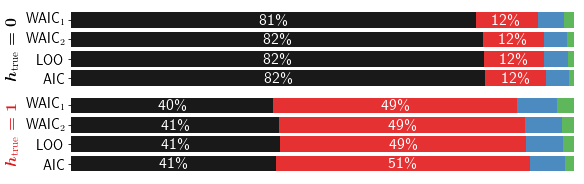

In [15]:
fig = plt.figure(figsize=(9,3))
gs0 = gridspec.GridSpec(2,1, hspace = 0.10,wspace=0.10)

ax = []


for j in range(2):
    ax+= [plt.Subplot(fig,gs0[j,0])]
    fig.add_subplot(ax[-1])
    cumulative = np.zeros(len(criteria))
    for k in range(4):
        widths = np.array([np.sum(histograms[(quantity, j)][k]) for quantity in criteria])
        ax[-1].barh(range(len(criteria)),widths,align='center',alpha=0.9,left=cumulative,color=colors[k])
        for l,w in enumerate(widths):
            # decide if we want to label some information
            if w>1000:
                ax[-1].text(cumulative[l]+w/2,l,"{0:.0f}\%".format(w/100),
                            ha="center",va="center",color='w',fontweight='black',fontsize=16)
        cumulative+= widths
        
        ax[-1].set_xlim((0,10000))
        ax[-1].set_xticks([])
        ax[-1].set_yticks(range(4))
        ax[-1].set_yticklabels(pretty_labels,fontsize=14)
        ax[-1].spines["top"].set_visible(False)
        ax[-1].spines["right"].set_visible(False)
        ax[-1].spines["bottom"].set_visible(False)
        ax[-1].spines["left"].set_visible(False)
        ax[-1].set_ylim((-0.5,len(criteria)-.5))
        
        ax[-1].set_ylabel(r"$\boldsymbol{h_{\textrm{true}}="+str(j)+"}$",fontsize=16,color=colors[j])



In [25]:
histograms['WAIC1',1]

array([4022, 4851,  807,  320])

Text(0.5,0,'Simulated power analysis')

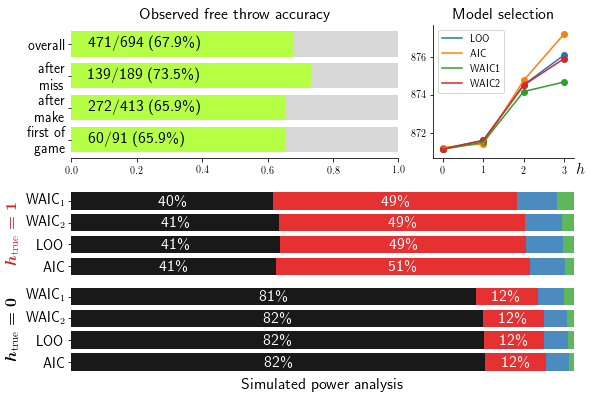

In [17]:
fig = plt.figure(figsize=(9,6.4))
gs00 = gridspec.GridSpec(2,1, height_ratios = [3.8,5.2], wspace = .2)
gs0 = gridspec.GridSpecFromSubplotSpec(1,2, hspace = 0.15,
                                       wspace=0.15,width_ratios=[7,3], subplot_spec=gs00[0])

ax = []
ax+= [plt.Subplot(fig,gs0[0,1])]
fig.add_subplot(ax[-1])

ax[-1].plot([v for v in bron_models_FT['LOO'].values()],label="LOO")
ax[-1].scatter(range(4),[v for v in bron_models_FT['LOO'].values()])
ax[-1].plot([v for v in bron_models_FT['AIC'].values()], label = "AIC")
ax[-1].scatter(range(4),[v for v in bron_models_FT['AIC'].values()])
ax[-1].plot([v for v in bron_models_FT['WAIC1'].values()],label = "WAIC1")
ax[-1].scatter(range(4),[v for v in bron_models_FT['WAIC1'].values()])
ax[-1].plot([v for v in bron_models_FT['WAIC2'].values()],label = "WAIC2")
ax[-1].scatter(range(4),[v for v in bron_models_FT['WAIC2'].values()])
ax[-1].set_title( "Model selection",fontsize=16)
ax[-1].spines['top'].set_visible(False)
ax[-1].spines['right'].set_visible(False)
ax[-1].set_xticks(range(4))
ax[-1].set_xlabel("$h$",fontsize=16)
ax[-1].xaxis.set_label_coords(1.05, -0.025)

ax[-1].legend()

ax+= [plt.Subplot(fig,gs0[0,0])]
fig.add_subplot(ax[-1])

ax[-1].barh(0, bron_1[0]['0'][0] ,align='center',alpha=0.9 ,color="greenyellow" )
ax[-1].barh(0, bron_1[0]['0'][1] ,left = bron_1[0]['0'][0] ,align='center',alpha=0.9 ,color="lightgray" )


ax[-1].barh(1, bron_1[0]['+'][0] ,align='center',alpha=0.9 ,color="greenyellow" )
ax[-1].barh(1, bron_1[0]['+'][1] ,left = bron_1[0]['+'][0] ,align='center',alpha=0.9 ,color="lightgray" )

ax[-1].barh(2, bron_1[0]['-'][0] ,align='center',alpha=0.9 ,color="greenyellow")
ax[-1].barh(2, bron_1[0]['-'][1] ,left = bron_1[0]['-'][0] ,align='center',alpha=0.9,color="lightgray" )

ax[-1].barh(3, bron_0[0][''][0] ,align='center',alpha=0.9,color="greenyellow" )
ax[-1].barh(3, bron_0[0][''][1] ,left = bron_0[0][''][0] ,align='center',alpha=0.9,color="lightgray" )

ax[-1].spines["top"].set_visible(False)
ax[-1].spines["right"].set_visible(False)
#ax[-1].spines["bottom"].set_visible(False)
ax[-1].spines["left"].set_visible(False)
ax[-1].set_yticks([0,1,2,3])
ax[-1].yaxis.tick_left()
ax[-1].set_yticklabels(["first of\ngame","after\nmake","after\n miss","overall" ],fontsize=14)

ax[-1].set_title( "Observed free throw accuracy",fontsize=16)
ax[-1].text(0.05,3-0.1,"471/694 (67.9\%)",fontsize=16,fontweight='bold')
ax[-1].text(0.05,2-0.1,"139/189 (73.5\%)",fontsize=16,fontweight='bold')
ax[-1].text(0.05,1-0.1,"272/413 (65.9\%)",fontsize=16,fontweight='bold')
ax[-1].text(0.05,0-0.1,"60/91 (65.9\%)",fontsize=16,fontweight='bold')
ax[-1].set_xlim((0,1))


gs1 = gridspec.GridSpecFromSubplotSpec(2,1, hspace = 0.10,wspace=0.10,subplot_spec=gs00[1])

ax = []


for j in range(2):
    ax+= [plt.Subplot(fig,gs1[1-j,0])]
    fig.add_subplot(ax[-1])
    cumulative = np.zeros(len(criteria))
    for k in range(4):
        widths = np.array([np.sum(histograms[(quantity, j)][k]) for quantity in criteria])
        ax[-1].barh(range(len(criteria)),widths,align='center',alpha=0.9,left=cumulative,color=colors[k])
        for l,w in enumerate(widths):
            # decide if we want to label some information
            if w>1000:
                ax[-1].text(cumulative[l]+w/2,l,"{0:.0f}\%".format(w/100),
                            ha="center",va="center",color='w',fontweight='bold',fontsize=16)
        cumulative+= widths
        
        ax[-1].set_xlim((0,10000))
        ax[-1].set_xticks([])
        ax[-1].set_yticks(range(4))
        ax[-1].set_yticklabels(pretty_labels,fontsize=14)
        ax[-1].spines["top"].set_visible(False)
        ax[-1].spines["right"].set_visible(False)
        ax[-1].spines["bottom"].set_visible(False)
        ax[-1].spines["left"].set_visible(False)
        ax[-1].set_ylim((-0.5,len(criteria)-.5))
        
        ax[-1].set_ylabel(r"$\boldsymbol{h_{\textrm{true}}="+str(j)+"}$",fontsize=16,color=colors[j])

ax[-2].set_xlabel("Simulated power analysis",fontsize=16)


#plt.savefig('../figures/fig4.pdf',bbox_inches = 'tight')

(0, 1)

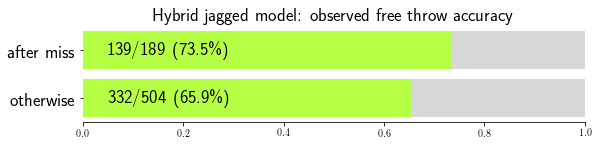

In [18]:
fig = plt.figure(figsize=(9,1.75))
gs0 = gridspec.GridSpec(1,1, hspace = 0.15,wspace=0.15)

ax = []

ax+= [plt.Subplot(fig,gs0[0,0])]
fig.add_subplot(ax[-1])

ax[-1].barh(0, bron_1[0]['0'][0] ,align='center',alpha=0.9 ,color="greenyellow" )
ax[-1].barh(0, bron_1[0]['0'][1] ,left = bron_1[0]['0'][0] ,align='center',alpha=0.9 ,color="lightgray" )


ax[-1].barh(1, 0.733 ,align='center',alpha=0.9 ,color="greenyellow" )
ax[-1].barh(1, 1-.733 ,left = .733 ,align='center',alpha=0.9 ,color="lightgray" )


ax[-1].spines["top"].set_visible(False)
ax[-1].spines["right"].set_visible(False)
#ax[-1].spines["bottom"].set_visible(False)
ax[-1].spines["left"].set_visible(False)
ax[-1].set_yticks([0,1])
ax[-1].yaxis.tick_left()
ax[-1].set_yticklabels(["otherwise","after miss" ],fontsize=18)

ax[-1].set_title( "Hybrid jagged model: observed free throw accuracy",fontsize=18)

ax[-1].text(0.05,1-0.1,"139/189 (73.5\%)",fontsize=18,fontweight='bold')
ax[-1].text(0.05,0-0.1,"332/504 (65.9\%)",fontsize=18,fontweight='bold')

ax[-1].set_xlim((0,1))


#plt.savefig('../figures/fig5.pdf',bbox_inches = 'tight')

In [19]:
hybrid_info(Lebron_FT,1)

{'AIC': 869.4034765709613,
 'LOO': 869.5197782598668,
 'WAIC1': 869.4475246427262,
 'WAIC2': 869.5181154335422}

In [24]:
hybrid_info(Lebron_FT,0)

{'AIC': 869.4034765709613,
 'LOO': 869.5588268754457,
 'WAIC1': 869.484781700595,
 'WAIC2': 869.5570956049493}

In [21]:
Lebron_FT

['-+',
 '+-++-++',
 '+--+-+++++-',
 '-+++-+-+-+',
 '+++++',
 '-++++++',
 '+++++',
 '+-+-+++-+',
 '-+',
 '--+++-+++-',
 '',
 '+-+',
 '+++++-++',
 '+++++',
 '+++++-++-',
 '++----+',
 '+++--+++---',
 '',
 '++++++-++',
 '+++-++-+-++++-',
 '+--+',
 '+--++--++',
 '++--+++-',
 '',
 '-+++-+--+-+',
 '+-++++',
 '+',
 '++-+++',
 '+--+-+-',
 '',
 '+---+-+',
 '++-++-',
 '-+-+++++++',
 '+--++++-+',
 '-+++++-+++',
 '++-+-+',
 '++++-++',
 '++++++++-',
 '+++',
 '-++++-+++-',
 '-+-++-++',
 '+-++-++',
 '++-+',
 '+-++-+-++++',
 '+-+-++-',
 '+-++-+-+++',
 '--+++--+',
 '-+-++-+',
 '++++-',
 '+--+-',
 '+-+++++-',
 '--+',
 '++++',
 '+--+-+',
 '++-+',
 '++++--',
 '',
 '-++++++-+',
 '-+++-++-',
 '--+-+++-',
 '',
 '+---+-++++',
 '+-++-++-',
 '++-+-+-++-',
 '++-',
 '+-+++',
 '---+++++--',
 '',
 '-+-++-++',
 '-+-+',
 '+++++++++--+++++',
 '-+-+++',
 '+--++-',
 '--+--++',
 '+-++--',
 '--+-+-++++--',
 '-++-++',
 '+++++++',
 '-++---',
 '+++-++++++',
 '',
 '',
 '-+++++++++-',
 '+-+-',
 '-++--+',
 '+-++',
 '---+++++',
 

In [32]:
 infer_model(Lebron_FT,["+","-"],1,1)

(defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+': array([0.65783133, 0.34216867]),
              '-': array([0.73298429, 0.26701571]),
              '0': array([0.65591398, 0.34408602])}),
 defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+': array([272., 141.]),
              '-': array([139.,  50.]),
              '0': array([60., 31.])}))

In [31]:
 sum(infer_model(Lebron_FT,["+","-"],0,0)[1][''])

693.0

In [33]:
infer_model(Lebron_FT,["+","-"],1,1)[0]

defaultdict(functools.partial(<built-in function zeros>, 2),
            {'+': array([0.65783133, 0.34216867]),
             '-': array([0.73298429, 0.26701571]),
             '0': array([0.65591398, 0.34408602])})